In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (70000, 784)
Y shape: (70000,)


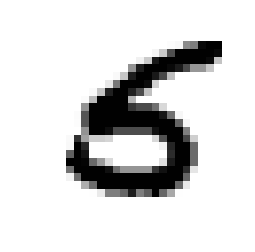

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[31001]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle the data
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
# binary classifier for the digit 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [24]:
y_pred = sgd_clf.predict(X_test)
n_correct = sum(y_pred == y_test_5)
print(n_correct/len(y_pred))

0.9696


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.96745,  0.96705,  0.95545])

In [27]:
from stupid_classifier import StupidClassifier

never_5_clf = StupidClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9095 ,  0.9089 ,  0.91055])

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train_5, y_train_pred)

In [34]:
tp = cf[1][1]
fp = cf[0][1]

precision = tp / (tp + fp)
print('Precision:', precision)

Precision: 0.861797752809


In [36]:
fn = cf[1][0]
recall = tp / (tp + fn)

print('Recall:', recall)

Recall: 0.707434052758


In [37]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.86179775280898874

In [38]:
recall_score(y_train_5, y_train_pred)

0.70743405275779381

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.77702360449802454

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 296643.40813423])

In [45]:
threshold = 300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

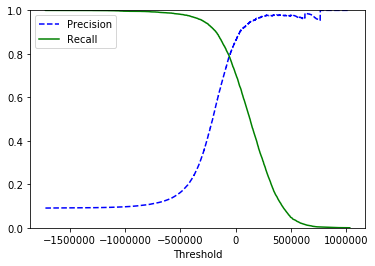

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

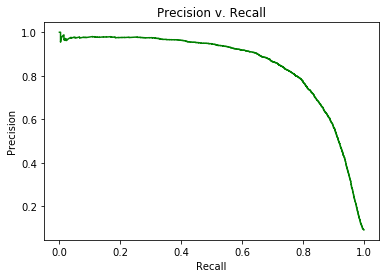

In [58]:
plt.plot(recalls[:-1], precisions[:-1], "g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision v. Recall')